# Mašinsko učenje - Priprema za kolokvijum

Pretpostavke:
1. Instalirana biblioteka pandas `python -m pip install scikit-learn`
2. Instalirana biblioteka scikit-learn `python -m pip install pandas`

In [44]:
import numpy as np
import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

## Zadatak 1
Učitati skup podataka abalone.csv. Izdvojiti kolone Viscera weight i Length. Iscrtati grafik za ove kolone. Podeliti skup podataka na obučavajući i test skup u odnosu 80:20. Na osnovu atributa Length odrediti vrednost atributa Viscera weight. Koristiti linearnu regresiju. Izmeriti grešku modela nad test podacima. Grafički prikazati rezultate model.

[12.21281086]
0.8800716004393172


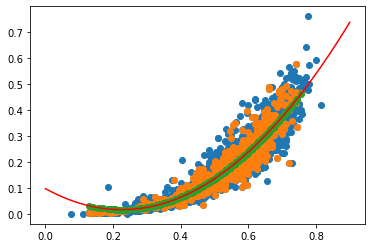

In [2]:
abalone = pandas.read_csv("datasets/abalone.csv")
viscera_weight = abalone["Viscera weight"]
length = abalone["Length"]

plt.scatter(length, viscera_weight)
train_x, test_x, train_y, test_y = train_test_split(length, viscera_weight, test_size = 0.2)
lin_reg = LinearRegression()
train_x = train_x.to_numpy().reshape(-1, 1)
train_x2 = np.column_stack([train_x, train_x**2])
test_x = test_x.to_numpy().reshape(-1, 1)
test_x2 = np.column_stack([test_x, test_x**2])
train_y = train_y.to_numpy()
test_y = test_y.to_numpy()
lin_reg.fit(train_x2, train_y)


x = np.linspace(0, 0.9, 1000).reshape(-1, 1)
x2 = np.column_stack([x, x**2])

plt.plot(x, lin_reg.predict(x2), c = 'r')

print(lin_reg.predict([[3,9]])) # predikcija u tacki
print(lin_reg.score(test_x2, test_y))
plt.scatter(test_x, test_y)
plt.scatter(test_x, lin_reg.predict(test_x2))

## Zadatak 2
Učitati skup podataka iris.csv. Izdvojiti prvu, drugu i poslednju kolonu. Poslednja kolona predstavlja klasu. Iscrtati grafik za ove kolone. Podeliti skup podataka na obučavajući i test skup u odnosu 80:20. Na osnovu prve dve kolone odrediti odrediti klasu kojoj instanca pripada. Koristiti neki od algoritama za klasifikaciju. Izmeriti grešku modela nad test podacima. Grafički prikazati rezultate model.

0.9


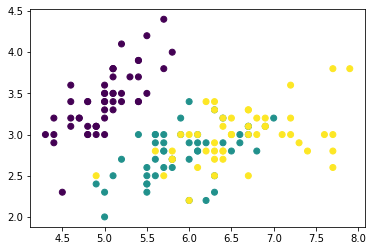

In [3]:
iris = pandas.read_csv("datasets/iris.csv", header = None)
x = iris.loc[:,:1].to_numpy()
y = iris[4].to_numpy()

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
plt.scatter(x[:,0], x[:,1], c = y)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)

knn = LogisticRegression()#KNeighborsClassifier(5)
knn.fit(train_x, train_y)
print(knn.score(test_x, test_y))


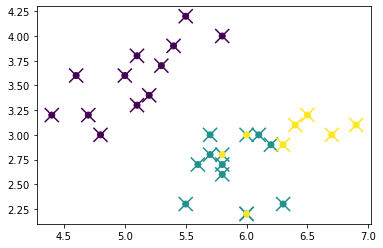

In [4]:
plt.scatter(test_x[:,0], test_x[:,1], c = knn.predict(test_x), marker = "x", s = 200)
plt.scatter(test_x[:,0], test_x[:,1], c = test_y)

## Zadatak 3
Učitati skup podataka churn.csv. Na osnovu svih atributa u skupu podatak potrebno je odrediti vrednost atributa churn. Obrazložiti izbor modela kao i transformacija sprovedenih nad podacima. Izračunati tačnost modela.

In [5]:
churn = pandas.read_csv("datasets/churn.csv")
churn.dropna() # Dropovanje svih onih koji nemaju vrijednost
churn = churn.drop(['State', 'Area Code', 'Phone'], axis = 1) # Dropovanje kolona koje nisu toliko bitne za klasifikaciju

# Konverzacija 'yes' i 'no' vrijednosti u 1 i 0
churn['VMail Plan'] = churn['VMail Plan'].map( 
                   {'yes':1 ,'no':0})
churn["Int'l Plan"] = churn["Int'l Plan"].map( 
                   {'yes':1 ,'no':0})

churn.head()


Account Length  Int'l Plan  VMail Plan  VMail Message  Day Mins  Day Calls  \
0             128           0           1             25     265.1        110   
1             107           0           1             26     161.6        123   
2             137           0           0              0     243.4        114   
3              84           1           0              0     299.4         71   
4              75           1           0              0     166.7        113   

   Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  Night Calls  \
0       45.07     197.4         99       16.78       244.7           91   
1       27.47     195.5        103       16.62       254.4          103   
2       41.38     121.2        110       10.30       162.6          104   
3       50.90      61.9         88        5.26       196.9           89   
4       28.34     148.3        122       12.61       186.9          121   

   Night Charge  Intl Mins  Intl Calls  Intl Charge  CustServ Calls  Churn?  
0         11.01       10.0           3         2.70               1  False.  
1         11.45       13.7           3         3.70               1  False.  
2          7.32       12.2           5         3.29               0  False.  
3          8.86        6.6           7         1.78               2  False.  
4          8.41       10.1           3         2.73               3  False.

Logistic regression score: 0.8650674662668666


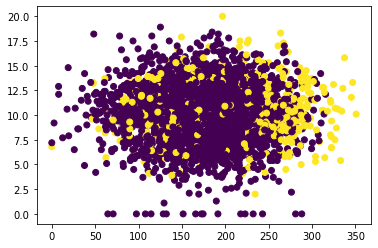

In [6]:
x = churn.loc[:'Account Length',:'CustServ Calls'].to_numpy() # Uzimam sve kolone od pocetne do krajnje za x
y = churn["Churn?"].to_numpy() # Uzimam krajnju kolonu za y jer onda predstavlja klasu

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
plt.scatter(x[:,4], x[:,13], c = y) # Uzimam Day Mins i Intl Mins za scatter-ovanje

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)

log_red = LogisticRegression(max_iter = 10000)
log_red.fit(train_x, train_y)
print("Logistic regression score: {}".format(log_red.score(test_x, test_y))) # Tacnost modela

In [7]:
knn = KNeighborsClassifier(5)
knn.fit(train_x, train_y)
print("KNN score: {}".format(knn.score(test_x, test_y)))

KNN score: 0.8680659670164917


## Zadatak 4
Učitati skup podataka cpu.csv. Na osnovu svih atributa u skupu podatak potrebno je odrediti vrednost atributa fork. Obrazložiti izbor modela kao i transformacija sprovedenih nad podacima. Izračunati tačnost modela.

In [8]:
cpu = pandas.read_csv("datasets/cpu.csv")
cpu.head()

time  lread  lwrite  scall  sread  swrite  fork  exec   rchar   wchar  \
0  11:30:07     44       0   3700    410     200  3.39  5.79  544367  247202   
1  15:44:35      7       0   3459    373     391  5.60  1.60  237571  409952   
2  11:09:06      7       4   4627   1283     136  2.00  3.59  509700   50768   
3  15:44:09      7       0   4197    627     498  5.59  2.00  274637  141793   
4  14:00:10      3       1   4821    236     258  2.00  9.38   83870  479867   

   ...    pflt    vflt  runqsz  runocc  freemem  freeswap  usr  sys  wio  idle  
0  ...  618.16  427.15     2.0      20      180   1118221   75   25  0.0   0.0  
1  ...  268.00  417.20     2.2     100      178   1374995   79   21  0.0   0.0  
2  ...  176.85  270.66     1.8     100      243   1130699   79   21  0.0   0.0  
3  ...  280.24  496.81     1.8      80      161    980552   77   23  0.0   0.0  
4  ...   74.45  163.87     2.0     100      963   1037206   80   19  0.0   0.0  

[5 rows x 27 columns]

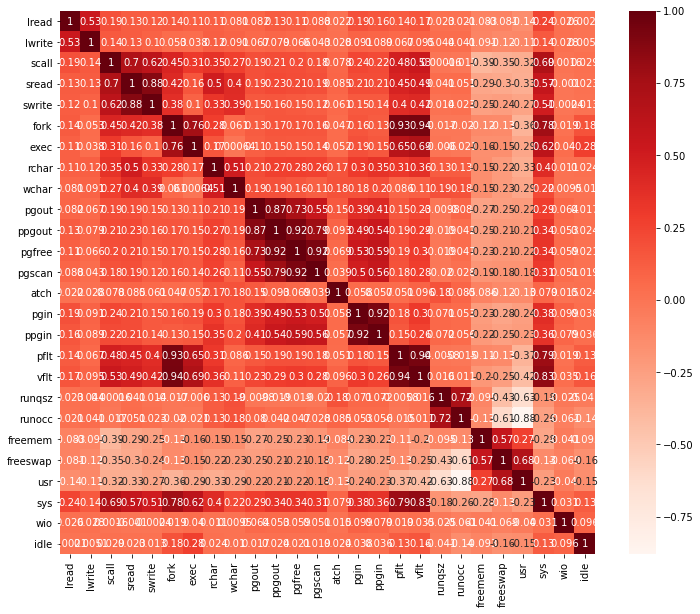

In [9]:

#Prikaz zavisnosti preko Pearsonove korelacije
plt.figure(figsize=(12,10))
cor = cpu.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()



Score: 0.8790762870724802
Predict for 270.66: [2.93191704]
Real value: 2


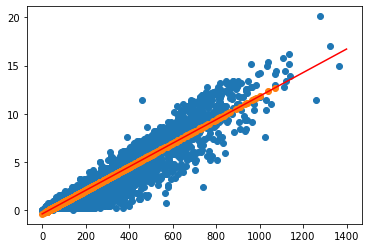

In [19]:
#cpu["vflt"][(np.abs(stats.zscore(cpu["vflt"])) < 3)]
# Kako ukloniti outlier-e?

vflt = cpu["vflt"]
fork = cpu["fork"]

plt.scatter(vflt, fork)

train_x, test_x, train_y, test_y = train_test_split(vflt, fork, test_size = 0.2)
lin_reg = LinearRegression()
train_x = train_x.to_numpy().reshape(-1, 1)
#train_x2 = np.column_stack([train_x, train_x**2])
test_x = test_x.to_numpy().reshape(-1, 1)
#test_x2 = np.column_stack([test_x, test_x**2])
train_y = train_y.to_numpy()
test_y = test_y.to_numpy()
lin_reg.fit(train_x, train_y)


x = np.linspace(0, 1400, 1000).reshape(-1, 1)
#x2 = np.column_stack([x, x**2])

plt.plot(x, lin_reg.predict(x), c = 'r')

#print(lin_reg.predict([[3,9]])) # predikcija u tacki
print("Score: {}".format(lin_reg.score(test_x, test_y)))
#plt.scatter(test_x, test_y)
plt.scatter(test_x, lin_reg.predict(test_x))
print("Predict for 270.66: {}".format(lin_reg.predict([[270.66]])))
print("Real value: 2")

## Zadatak 5
Na osnovu podataka dostavljenih u datoteci winequality-red.csv odrediti napraviti model za određivanje kvaliteta vina. Obrazložiti izbor modela i transformacije primenjene nad podacima. Izračunati tačnost modela.

In [24]:
wine = pandas.read_csv("datasets/winequality-red.csv", sep=";")
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

Logistic regression score: 0.59375
Perceptron score: 0.453125
SGD score: 0.5543393275996873


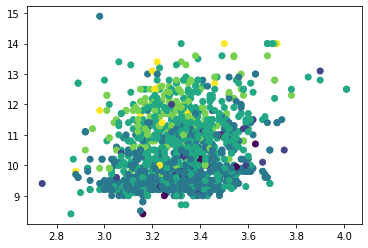

In [49]:
x = wine.loc[:'fixed acidity',:'alcohol'].to_numpy() # Uzimam sve kolone od pocetne do krajnje za x
y = wine["quality"].to_numpy() # Uzimam krajnju kolonu za y jer onda predstavlja klasu

# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)
plt.scatter(x[:,8], x[:,10], c = y) # pH i alcohol

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)

# LogisticRegression
log_red = LogisticRegression(max_iter = 30000)
log_red.fit(train_x, train_y)
print("Logistic regression score: {}".format(log_red.score(test_x, test_y))) # Tacnost modela

# Perceptron
clf = Perceptron(max_iter = 30000)
clf.fit(train_x, train_y)
print("Perceptron score: {}".format(clf.score(test_x, test_y))) # Tacnost modela

#SGD
sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=30000, tol=1e-3))
sgd.fit(train_x, train_y)
print("SGD score: {}".format(sgd.score(train_x, train_y)))